# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.


Dataset yang saya gunakan adalah dataset yang berasal dari Kaggle dengan judul "Telco Customer Churn" yang dapat diakses melalui link https://www.kaggle.com/datasets/blastchar/telco-customer-churn

Dataset ini berisi data pelanggan sebuah perusahaan layanan telekomunikasi yang digunakan untuk menganalisis perilaku pelanggan serta kecenderungan mereka untuk berhenti berlangganan (churn). Dataset ini merepresentasikan informasi pelanggan yang mencakup layanan yang digunakan, kondisi akun pelanggan, serta karakteristik demografis. Melalui data tersebut, dapat diketahui jenis layanan yang dimiliki pelanggan, pola kontrak dan metode pembayaran, serta durasi pelanggan dalam menggunakan layanan perusahaan.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [120]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [121]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [122]:
data_path = "/content/drive/MyDrive/Eksperimen_SML_Ardinda_Nur_Ramadhani/telco_customer_churn_raw.csv"

# Load dataset
df = pd.read_csv(data_path)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [124]:
df.shape

(7043, 21)

In [125]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [126]:
# Jumlah churn
df['Churn'].value_counts()

,count
Churn,
No,5174
Yes,1869


Berdasarkan distribusi label churn, mayoritas pelanggan berada pada kategori tidak melakukan churn, dengan jumlah sekitar 5.174 pelanggan. Sementara itu, terdapat sekitar 1.869 pelanggan yang tercatat berhenti berlangganan. Hal ini menunjukkan bahwa meskipun sebagian besar pelanggan tetap bertahan, proporsi pelanggan yang melakukan churn tergolong cukup signifikan. Kondisi ini mengindikasikan adanya potensi permasalahan dalam retensi pelanggan dan menjadikan churn sebagai isu penting yang perlu dianalisis lebih lanjut

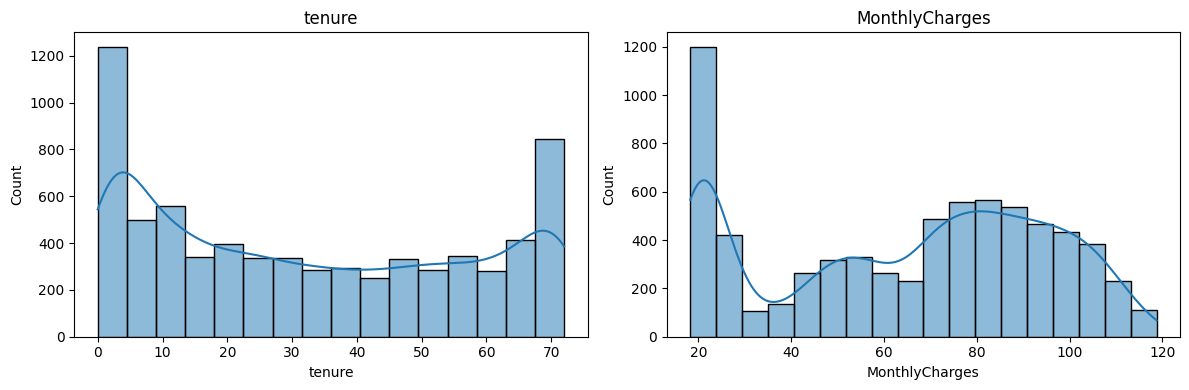

In [127]:
# Analisis fitur numerik
import matplotlib.pyplot as plt
import seaborn as sns

num_cols = ['tenure', 'MonthlyCharges']

plt.figure(figsize=(12,4))
for i, col in enumerate(num_cols, 1):
    plt.subplot(1,2,i)
    sns.histplot(df[col], kde=True)
    plt.title(col)
plt.tight_layout()
plt.show()



*   Distribusi fitur tenure menunjukkan konsentrasi pelanggan pada masa berlangganan yang relatif pendek, dengan frekuensi tinggi di awal periode. Hal ini mengindikasikan bahwa banyak pelanggan masih berada pada fase awal berlangganan, sementara sebagian pelanggan lain bertahan hingga jangka waktu yang lebih panjang.
*  Distribusi MonthlyCharges menunjukkan variasi biaya bulanan yang cukup lebar, dengan kecenderungan nilai yang lebih tinggi pada sebagian pelanggan. Hal ini menandakan adanya perbedaan paket atau layanan yang digunakan pelanggan, yang berpotensi memengaruhi keputusan pelanggan untuk melakukan churn.


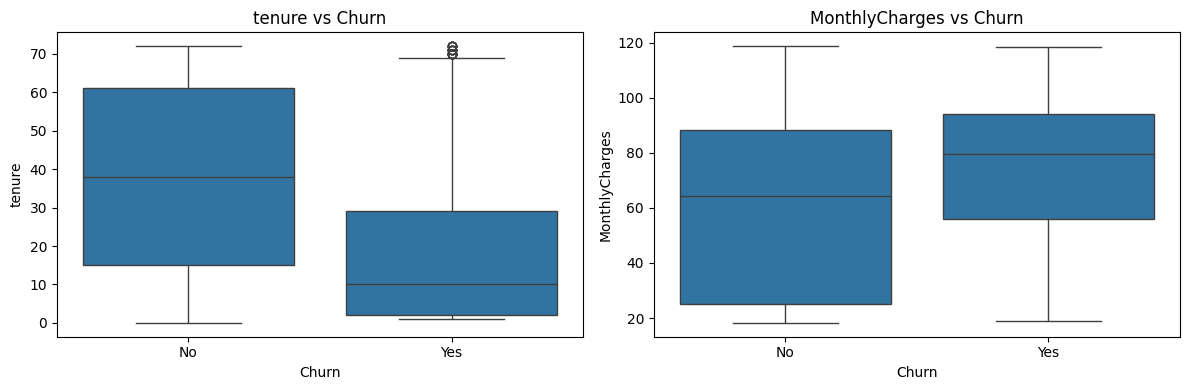

In [128]:
# Hubungan Fitur Numerik dengan Churn
plt.figure(figsize=(12,4))
for i, col in enumerate(num_cols, 1):
    plt.subplot(1,2,i)
    sns.boxplot(x='Churn', y=col, data=df)
    plt.title(f"{col} vs Churn")
plt.tight_layout()
plt.show()

Pelanggan yang churn cenderung memiliki masa berlangganan yang lebih singkat dan biaya bulanan yang lebih tinggi dibandingkan pelanggan yang tidak churn.

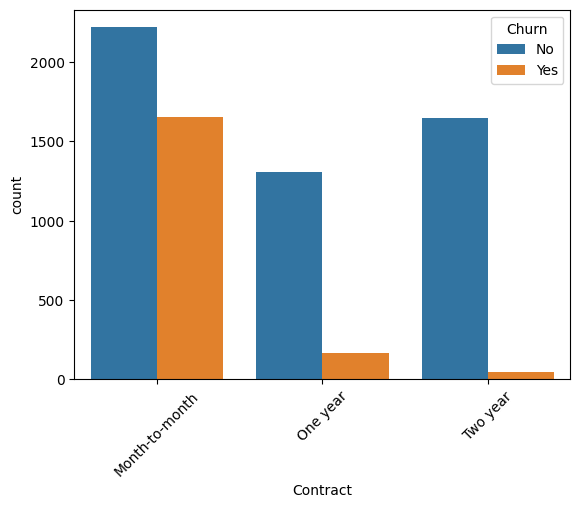

In [129]:
# Analisis Fitur Kategorikal
sns.countplot(x='Contract', hue='Churn', data=df)
plt.xticks(rotation=45)
plt.show()

Pelanggan dengan kontrak bulanan memiliki tingkat churn lebih tinggi dibandingkan pelanggan dengan kontrak jangka panjang.

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [130]:
# Menghapus fitur yang tidak relevan
df.drop(columns=['customerID'], inplace=True)

In [131]:
# Konversi kolom TotalCharges
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [132]:
# Mengecek missing values
df.isnull().sum()

,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0
OnlineBackup,0


In [133]:
# Menangani missing values pada kolom TotalCharges
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)

/tmp/ipython-input-3042945715.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)


In [134]:
df.isnull().sum()

,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0
OnlineBackup,0


In [135]:
# Memeriksa data duplikat
df.duplicated().sum()

np.int64(22)

In [136]:
# Deteksi dan penanganan outliers
import numpy as np

Q1 = df[num_cols].quantile(0.25)
Q3 = df[num_cols].quantile(0.75)
IQR = Q3 - Q1

outliers = ((df[num_cols] < (Q1 - 1.5 * IQR)) | (df[num_cols] > (Q3 + 1.5 * IQR))).sum()
outliers

,0
tenure,0
MonthlyCharges,0


In [137]:
# Binning
df['tenure_group'] = pd.cut(
    df['tenure'],
    bins=[0, 12, 24, 48, 72],
    labels=['Low', 'Medium', 'High', 'Very High']
)

In [138]:
# Encoding target
df['Churn'] = df['Churn'].map({'No': 0, 'Yes': 1})

In [139]:
# Standarisasi Fitur Numerik
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
df[num_cols] = scaler.fit_transform(df[num_cols])

In [140]:
# Encoding kategorikal
df = pd.get_dummies(df, drop_first=True, dtype=int)

In [141]:
df.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,...,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_Medium,tenure_group_High,tenure_group_Very High
0,0,-1.277445,-1.160323,-0.994242,0,0,1,0,0,1,...,0,0,0,1,0,1,0,0,0,0
1,0,0.066327,-0.259629,-0.173244,0,1,0,0,1,0,...,0,1,0,0,0,0,1,0,1,0
2,0,-1.236724,-0.362660,-0.959674,1,1,0,0,1,0,...,0,0,0,1,0,0,1,0,0,0
3,0,0.514251,-0.746535,-0.194766,0,1,0,0,0,1,...,0,1,0,0,0,0,0,0,1,0
4,0,-1.236724,0.197365,-0.940470,1,0,0,0,1,0,...,0,0,0,1,0,1,0,0,0,0


In [142]:
df.shape

(7043, 34)

In [143]:
# Simpan dataset bersih
df_cleaned = df.copy()

df_cleaned.to_csv('telco_customer_churn_preprocessing.csv',
    index=False
)
print("Dataset bersih berhasil disimpan.")

Dataset bersih berhasil disimpan.
